# Task 3 : Prediction using Decision Tree Algorithm
## Predict the right class for new data using decision tree classifier and visualize classification.
## Author : Sushant Pagam

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 1 : Load the dataset

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Step 3 : Separation of independent and dependent matrices

In [5]:
# Independent matrices
X = data.iloc[ : , 1: -1 ].values
# Dependent matrices
y = data.iloc[ : , 5].values

In [6]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [7]:
y[0]

'Iris-setosa'

### Step 4 : Handling of categorical data

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
y_labelencoder = LabelEncoder()

In [10]:
y = y_labelencoder.fit_transform(y)

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
# 0 -> setosa
# 1 -> versicolor
# 2 -> virginica

### Step 4 : Applying suitable ML algorithm

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
classifier = DecisionTreeClassifier()

In [15]:
classifier.fit(X, y)

DecisionTreeClassifier()

## Step 5 : Visualization of classifier results

### Way 1 : Textual tree 

In [16]:
from sklearn import tree

In [17]:
text_tree = tree.export_text(classifier)
print(text_tree)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



### Way 2 : Decision tree

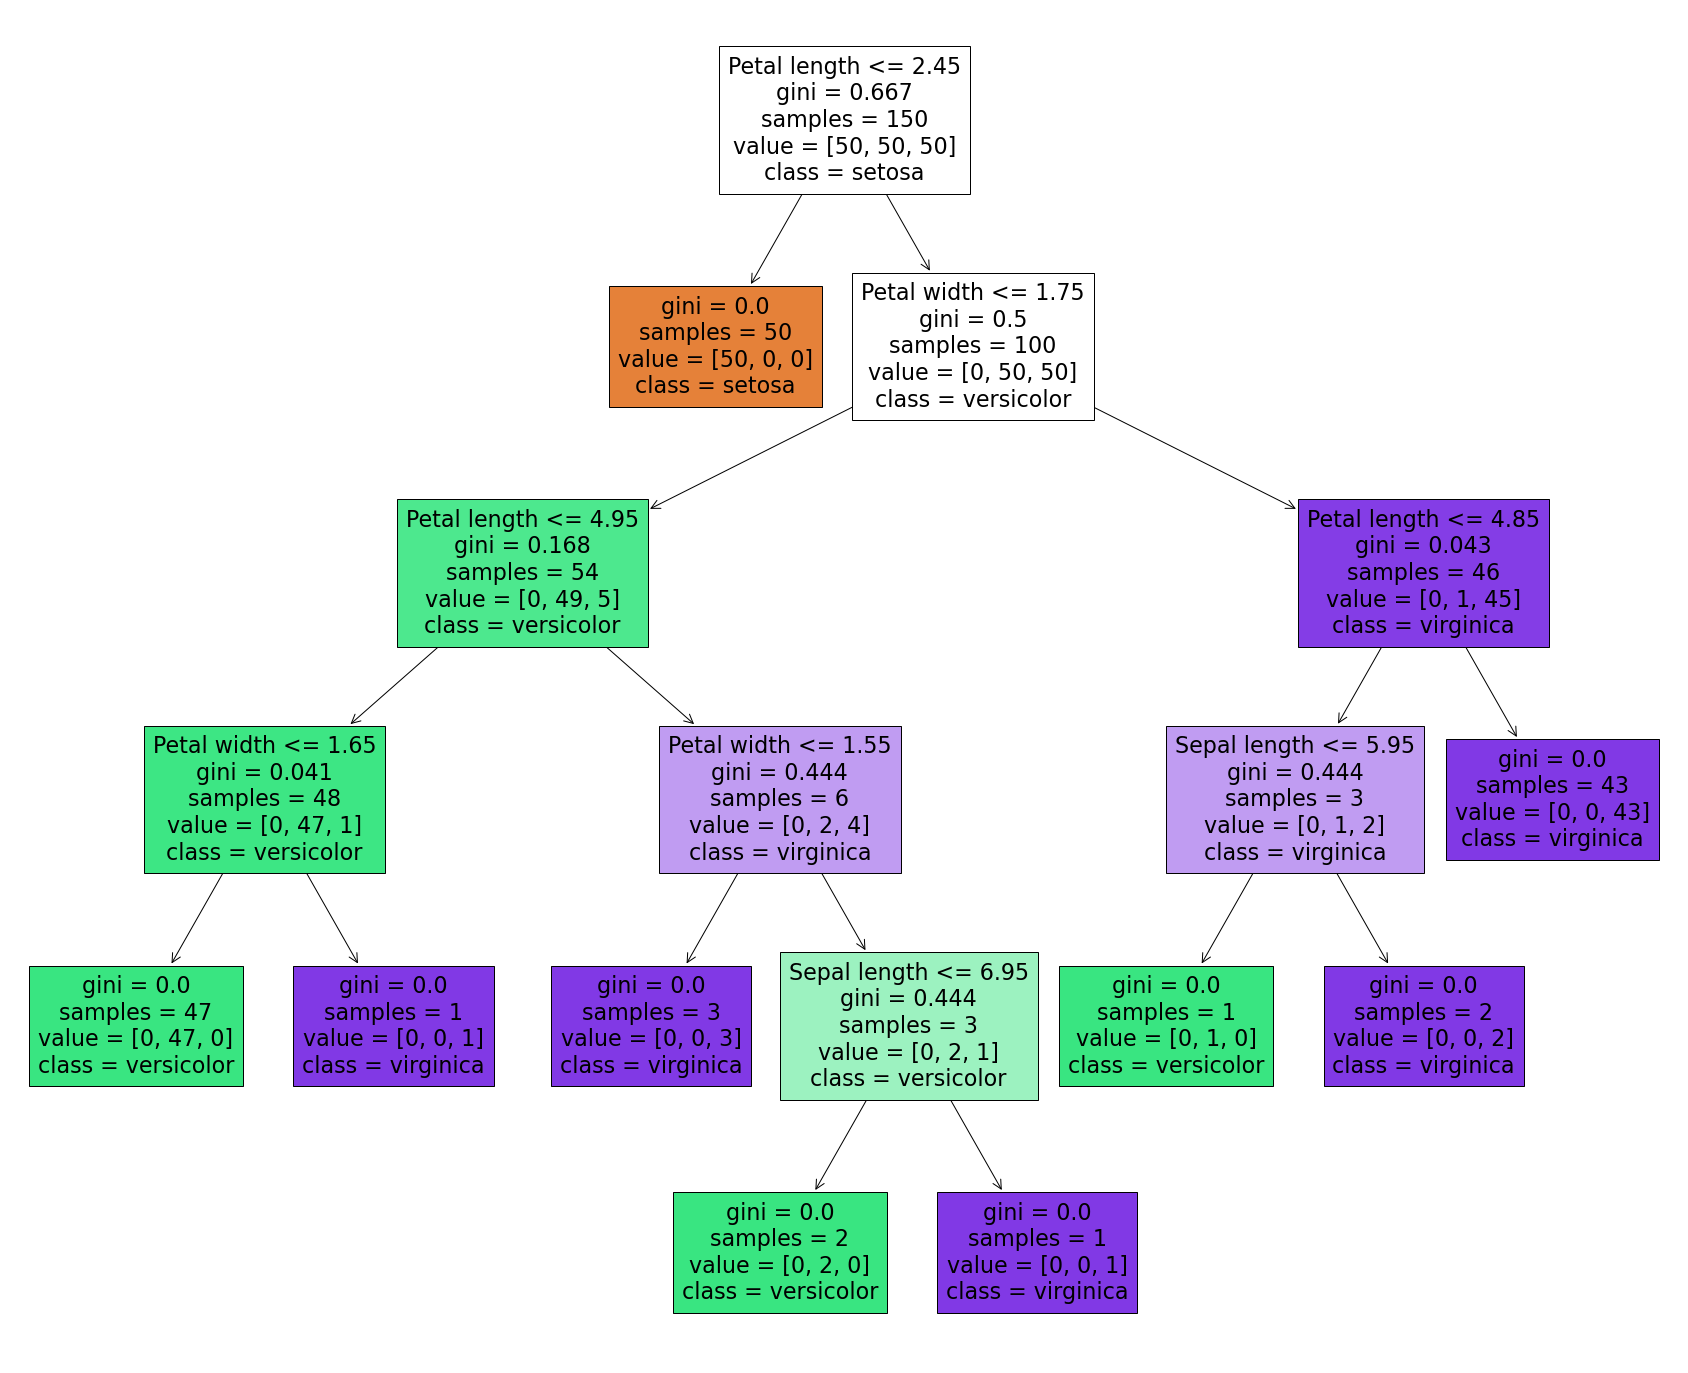

In [18]:
fig = plt.figure(figsize=(30,25))
tree.plot_tree(classifier,
                   feature_names=['Sepal length', 'Sepal width', 'Petal length', 'Petal width'],
                   class_names=['setosa', 'versicolor' , 'virginica'],
                   filled=True
                  )
plt.show()
fig.savefig('DecisionTree.png')

## Feeding new data and predicting right class

In [19]:
# Inputs of independent variables
sepal_length = float(input('SepalLengthCm = '))
sepal_width = float(input('SepalWidthCm   = '))
petal_length = float(input('PetalLengthCm = '))
petal_width = float(input('PetalWidthCm   = '))

SepalLengthCm = 4.5
SepalWidthCm   = 5.6
PetalLengthCm = 1.9
PetalWidthCm   = 0.2


In [20]:
# Independent matrix 
X_classify = np.array([sepal_length, sepal_width, petal_length, petal_width]).reshape(1,-1)
print(f"\nX = {X_classify}")


X = [[4.5 5.6 1.9 0.2]]


In [21]:
# Predict the right class
y_classified = classifier.predict(X_classify)
y_classified

array([0])

## Hence new data ,
## sepal length = 4.5 cm & sepal width = 5.6 cm
## petal length = 1.9 cm & petal width = 0.2 cm
## Predicted to class of "Iris-Setosa".